<a href="https://colab.research.google.com/github/NataliiaHromyk/HomeWork_Python_DS/blob/main/Hromyk_%22HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle) Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.version()

'0.1.22'

In [4]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nataliiahromyk
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 645MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-3/bank-customer-churn-prediction-dlu-course-c-3.zip to ./bank-customer-churn-prediction-dlu-course-c-3


In [6]:
import os

In [7]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-3'

In [8]:
os.listdir(data_dir)

['train.csv', 'test.csv', 'sample_submission.csv']

In [9]:
train_csv = data_dir + '/train.csv'

In [10]:
import pandas as pd

In [11]:
train_main_df = pd.read_csv(train_csv)

In [12]:
train_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


дані повністю підготовленні до моделювання. Підчищати нічого не потрібно

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
?train_test_split

In [15]:
train_df, val_df = train_test_split(train_main_df, test_size=0.2, random_state=42, stratify=train_main_df['Exited'])

In [16]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (12000, 14)
val_df.shape : (3000, 14)


In [17]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,12000.000000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,7479.628917,1.569092e+07,658.840250,37.687917,5.026083,43008.174362,1.590250,0.790333,0.491583,117992.400015,0.203500
std,4334.088776,1.469310e+05,72.334909,8.138440,2.781974,59906.627660,0.532646,0.407088,0.499950,45589.484607,0.402618
min,0.000000,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3725.750000,1.563512e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83343.730000,0.000000
50%,7471.500000,1.568995e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123613.910000,0.000000
75%,11231.250000,1.575692e+07,708.000000,42.000000,7.000000,109949.050000,2.000000,1.000000,1.000000,156912.810000,0.000000
max,14999.000000,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [18]:
val_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,7578.984333,1.569359e+07,659.359667,37.946333,5.022000,41616.262490,1.593667,0.782667,0.482000,116953.730907,0.203333
std,4314.773171,7.102303e+04,71.949644,8.528835,2.755851,59001.346626,0.531025,0.412500,0.499759,46308.105231,0.402546
min,1.000000,1.556571e+07,434.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,479.540000,0.000000
25%,3838.500000,1.563633e+07,604.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82617.467500,0.000000
50%,7615.000000,1.569163e+07,663.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122960.980000,0.000000
75%,11330.250000,1.575791e+07,708.000000,42.000000,7.000000,107757.515000,2.000000,1.000000,1.000000,156687.360000,0.000000
max,14995.000000,1.581455e+07,850.000000,72.000000,10.000000,185966.640000,4.000000,1.000000,1.000000,199953.330000,1.000000


In [19]:
train_df['Exited'].sum()/len(train_df['Exited']), val_df['Exited'].sum()/len(val_df['Exited'])

(np.float64(0.2035), np.float64(0.20333333333333334))

In [20]:
train_df['Exited'].value_counts(), val_df['Exited'].value_counts()

(Exited
 0.0    9558
 1.0    2442
 Name: count, dtype: int64,
 Exited
 0.0    2390
 1.0     610
 Name: count, dtype: int64)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [21]:
input_cols = list(train_main_df.columns)[1:-1]
target_col = 'Exited'

In [22]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [23]:
numeric_cols = train_inputs.select_dtypes(include='number').columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [24]:
categorical_cols

['Surname', 'Geography', 'Gender']

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [25]:
train_inputs[categorical_cols].nunique()

,0
Surname,732
Geography,3
Gender,2


In [26]:
train_inputs[categorical_cols]

,Surname,Geography,Gender
7180,Mays,France,Male
10393,Ch'eng,France,Female
80,Ch'in,Germany,Male
3365,K?,Spain,Male
12236,Trevisani,France,Male
...,...,...,...
9493,Onyekachi,France,Female
8463,Tsao,France,Female
8143,Hsia,France,Male
11512,Onuora,Spain,Male


In [27]:
train_main_df['Gender'].value_counts()

,count
Gender,
Male,8529
Female,6471


Вважаю, що категоріальну колонку Surname варто виключити, оскільки к-сть унікальних показників для даної вибірки являється дуже великою. Поле Geography закодуємо як категоріальні ознаки, а поле Gender переведемо в числові бінарні значення, де 1 - буде Male, а 0 - Female

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [30]:
encoded_cols_name = ['Geography']

In [31]:
encoder.fit(train_inputs[encoded_cols_name])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [32]:
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [33]:
encoded_cols = list(encoder.get_feature_names_out(encoded_cols_name))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain']


In [34]:
encoder.transform(train_inputs[encoded_cols_name])[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [35]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[encoded_cols_name])
val_inputs[encoded_cols] = encoder.transform(val_inputs[encoded_cols_name])

Тепер замінюємо значення 1 та 0 по гендеру, де 1 - Male, 0 - Female

In [36]:
train_inputs['Gender_Male_code'] = train_inputs.Gender.map({'Female': 0, 'Male': 1})
val_inputs['Gender_Male_code'] = val_inputs.Gender.map({'Female': 0, 'Male': 1})

In [37]:
train_inputs[numeric_cols].nunique()

,0
CustomerId,5700
CreditScore,373
Age,56
Tenure,11
Balance,2895
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,5502


Наступним будемо робити масштабування числових ознак, але  виключимо бінарні значення HasCrCard та IsActiveMember


In [38]:
train_main_df[numeric_cols].describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.569146e+07,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193
std,1.352050e+05,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888
min,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563514e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000
50%,1.569018e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000
75%,1.575718e+07,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000
max,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
numeric_cols

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [41]:
scaler_numeric_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(train_inputs[scaler_numeric_cols])

MinMaxScaler()

Тепер ми можемо окремо масштабувати навчальні, валідаційні та тестові набори, використовуючи метод transform класу scaler.

In [44]:
train_inputs[scaler_numeric_cols] = scaler.transform(train_inputs[scaler_numeric_cols])
val_inputs[scaler_numeric_cols] = scaler.transform(val_inputs[scaler_numeric_cols])

In [45]:
train_inputs[scaler_numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.54,0.35,0.50,0.21,0.20,0.59
std,0.17,0.15,0.28,0.29,0.18,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.25,0.30,0.00,0.00,0.42
50%,0.55,0.34,0.50,0.00,0.33,0.62
75%,0.66,0.43,0.70,0.52,0.33,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00


In [46]:
display(train_inputs.head(5))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male_code
7180,15652218.0,Mays,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,1
10393,15592937.0,Ch'eng,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,0
80,15774586.0,Ch'in,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,1
3365,15780572.0,K?,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,1
12236,15642099.0,Trevisani,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,1


In [47]:
display(val_inputs.head(5))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male_code
6490,15794345.0,Pirozzi,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,1
3646,15617348.0,Ritchie,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,1
5306,15787907.0,Hs?eh,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,0
652,15803378.0,Onio,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,0
2627,15772423.0,Genovesi,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [48]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 16)
train_targets: (12000,)
val_inputs: (3000, 16)
val_targets: (3000,)


In [49]:
!pip install pyarrow --quiet

In [50]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [51]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

CPU times: user 6.53 ms, sys: 0 ns, total: 6.53 ms
Wall time: 6.54 ms


In [52]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

CPU times: user 36.3 ms, sys: 8.86 ms, total: 45.2 ms
Wall time: 129 ms


In [53]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (12000, 16)
train_targets: (12000,)
val_inputs: (3000, 16)
val_targets: (3000,)


In [54]:
val_inputs

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male_code
6490,15794345.0,Pirozzi,0.675418,Germany,Male,0.500000,0.1,0.551870,1.000000,1.0,1.0,0.364704,0.0,1.0,0.0,1
3646,15617348.0,Ritchie,0.386635,France,Male,0.410714,0.5,0.000000,0.333333,1.0,1.0,0.190942,1.0,0.0,0.0,1
5306,15787907.0,Hs?eh,0.715990,France,Female,0.357143,0.2,0.000000,0.333333,0.0,1.0,0.584853,1.0,0.0,0.0,0
652,15803378.0,Onio,0.577566,France,Female,0.446429,0.4,0.742441,0.000000,0.0,1.0,0.558109,1.0,0.0,0.0,0
2627,15772423.0,Genovesi,0.589499,Spain,Female,0.214286,0.4,0.000000,0.333333,1.0,0.0,0.718420,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10550,15635388.0,Hsia,0.589499,France,Male,0.357143,0.4,0.000000,0.333333,1.0,0.0,0.667682,1.0,0.0,0.0,1
8866,15589715.0,Ting,0.768496,France,Male,0.642857,0.6,0.000000,0.000000,1.0,0.0,0.885353,1.0,0.0,0.0,1
3244,15682890.0,Okwuadigbo,0.589499,Spain,Male,0.250000,0.5,0.000000,0.333333,1.0,0.0,0.883589,0.0,0.0,1.0,1
12441,15690188.0,Aitken,0.699284,Spain,Male,0.267857,0.5,0.658646,0.000000,1.0,0.0,0.528593,0.0,0.0,1.0,1


In [55]:
val_targets

,Exited
6490,1.0
3646,0.0
5306,0.0
652,0.0
2627,0.0
...,...
10550,0.0
8866,1.0
3244,0.0
12441,0.0


In [56]:
!ls

bank-customer-churn-prediction-dlu-course-c-3  train_targets.parquet
sample_data				       val_inputs.parquet
train_inputs.parquet			       val_targets.parquet


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [57]:
model_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain','Gender_Male_code']

In [58]:
train_inputs

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male_code
7180,15652218.0,Mays,0.599045,France,Male,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,1
10393,15592937.0,Ch'eng,0.603819,France,Female,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,0
80,15774586.0,Ch'in,0.653938,Germany,Male,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,1
3365,15780572.0,K?,0.568019,Spain,Male,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,1
12236,15642099.0,Trevisani,0.658711,France,Male,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,15711299.0,Onyekachi,0.482100,France,Female,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,0
8463,15778418.0,Tsao,0.577566,France,Female,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,0
8143,15585192.0,Hsia,0.453461,France,Male,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,1
11512,15694450.0,Onuora,0.379475,Spain,Male,0.428571,0.7,0.000000,0.333333,0.0,0.0,0.363197,0.0,0.0,1.0,1


In [59]:
X_train = train_inputs[model_columns]
X_val  = val_inputs[model_columns]

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(solver='liblinear')

In [62]:
?model

In [63]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [64]:
model.coef_.round(2)

array([[-0.88,  8.45, -0.08, -1.1 , -3.94, -0.19, -1.25,  0.19, -1.03,
         0.54, -1.12, -0.86]])

In [65]:
model.intercept_

array([-1.60464126])

In [66]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
train_targets.value_counts()

,count
Exited,
0.0,9558
1.0,2442


In [68]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.98536749, 0.01463251],
       [0.72911631, 0.27088369],
       [0.87257622, 0.12742378],
       ...,
       [0.99276294, 0.00723706],
       [0.83144071, 0.16855929],
       [0.94939177, 0.05060823]])

In [69]:
import numpy as np
np.argmax(train_probs, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

(array([6331., 1944.,  917.,  616.,  481.,  414.,  316.,  319.,  359.,
         303.]),
 array([0.00141844, 0.10051291, 0.19960738, 0.29870185, 0.39779632,
        0.49689079, 0.59598526, 0.69507973, 0.7941742 , 0.89326867,
        0.99236314]),
 <BarContainer object of 10 artists>)

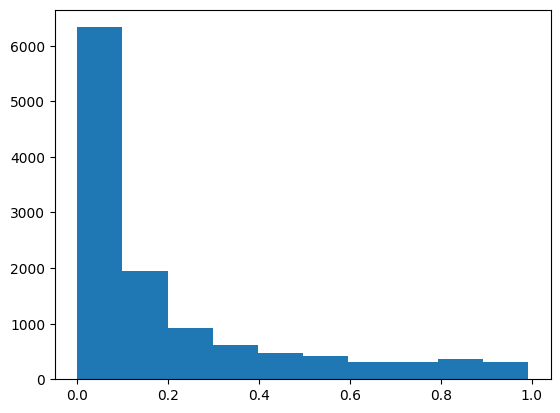

In [70]:
import matplotlib.pyplot as plt
plt.hist(train_probs[:,1])

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [72]:
accuracy_score(train_targets, train_preds)

0.87425

In [73]:
confusion_matrix(train_targets, train_preds)

array([[9177,  381],
       [1128, 1314]])

In [74]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 87.42%


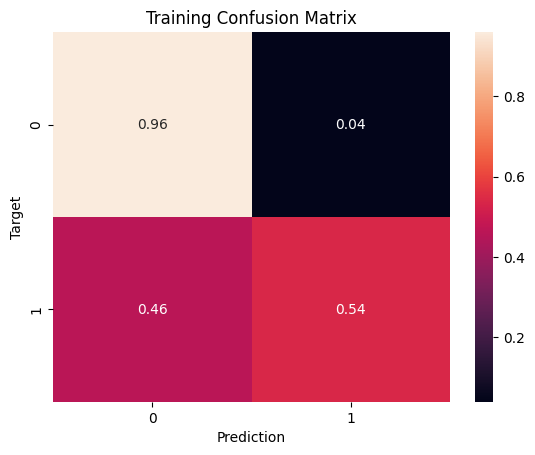

In [75]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 87.17%


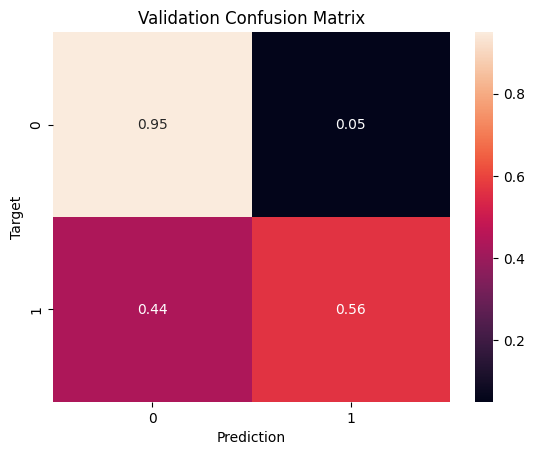

In [76]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

In [77]:
#F1 score
from sklearn.metrics import f1_score

In [78]:
f1_score(train_targets, train_preds, pos_label=1)

0.6352429296591733

In [79]:
f1_score(val_targets, val_preds, pos_label=1)

0.641192917054986

ROC and AUC

In [80]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.88


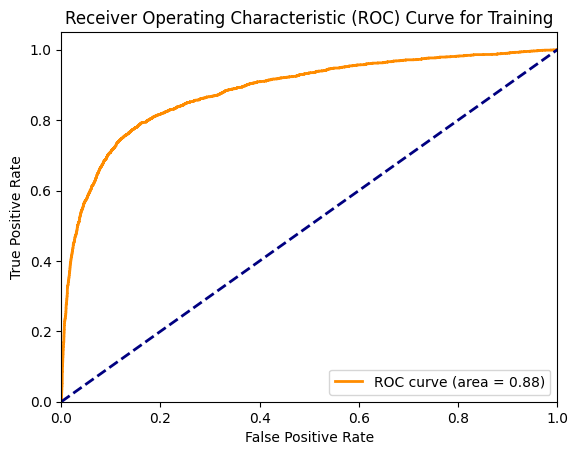

AUROC for Validation: 0.88


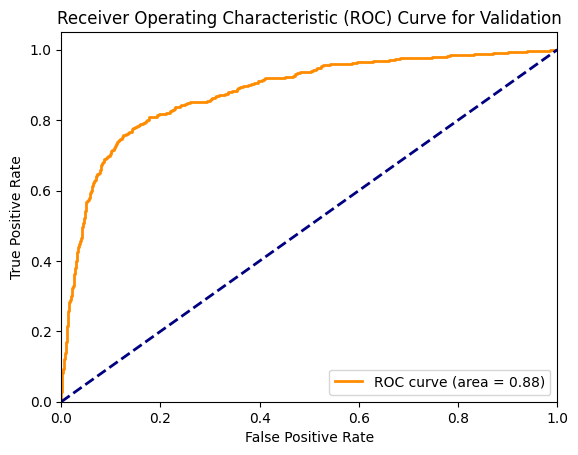

In [81]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

Якість даної моделі являється хорошою, оскільки площа під кривою рівна 0.88, що являється доволі високим показником


8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [82]:
majority_class = np.bincount(train_targets).argmax()
print("Мажоритарний клас:", majority_class)

Мажоритарний клас: 0


In [83]:
train_preds_m = np.full_like(train_targets, fill_value=majority_class)
val_preds_m = np.full_like(val_targets, fill_value=majority_class)

In [84]:
print("Accuracy реальної моделі")
print("Train:", accuracy_score(train_targets, train_preds))
print("Val:  ", accuracy_score(val_targets, val_preds))

Accuracy реальної моделі
Train: 0.87425
Val:   0.8716666666666667


In [85]:
print("Accuracy наївної моделі (яка завжди передбачає", majority_class,"):")
print("Train:", accuracy_score(train_targets, train_preds_m))
print("Val:  ", accuracy_score(val_targets, val_preds_m))

Accuracy наївної моделі (яка завжди передбачає 0 ):
Train: 0.7965
Val:   0.7966666666666666


Як ми бачимо, якість нашої моделі  - вища, ніж якби ми всім значенням таргету надали б показник 0. Це говорить, що ми точніше вгадуємо використовуючи нашу модель

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [86]:
import joblib

In [87]:
aussie_rain = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'scaler_numeric_cols': scaler_numeric_cols,
    'model_columns': model_columns,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [88]:
joblib.dump(aussie_rain, 'log_reg.joblib')

['log_reg.joblib']

In [89]:
model_2 = joblib.load('log_reg.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [90]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, scaler_numeric_cols, encoded_cols, encoded_cols_name, model_columns, input_df: pd.DataFrame):
    input_df[scaler_numeric_cols] = scaler.transform(input_df[scaler_numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[encoded_cols_name])
    input_df['Gender_Male_code'] = input_df.Gender.map({'Female': 0, 'Male': 1})
    X_input = input_df[model_columns]
    prob = model.predict_proba(X_input)[:,1]
    return prob


In [91]:
predict_raw_df(scaler, encoder, scaler_numeric_cols, encoded_cols, encoded_cols_name, model_columns, train_main_df[:5])

array([0.00653297, 0.03674711, 0.37092276, 0.37605273, 0.97579676])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [92]:
test_csv = data_dir + '/test.csv'

In [93]:
test_raw_df = pd.read_csv(test_csv)

In [94]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [95]:
predict_raw_df(scaler, encoder, scaler_numeric_cols, encoded_cols, encoded_cols_name, model_columns, test_raw_df[:5])

array([0.07534057, 0.03538506, 0.15296203, 0.19468273, 0.05561385])

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [96]:
subm_pred = predict_raw_df(scaler, encoder, scaler_numeric_cols, encoded_cols, encoded_cols_name, model_columns, test_raw_df)
subm_pred

array([0.07534057, 0.03538506, 0.15296203, ..., 0.01862123, 0.15546958,
       0.09327418])

In [97]:
!ls

bank-customer-churn-prediction-dlu-course-c-3  train_targets.parquet
log_reg.joblib				       val_inputs.parquet
sample_data				       val_targets.parquet
train_inputs.parquet


In [98]:
sample_submission_csv = data_dir + '/sample_submission.csv'

In [99]:
sample_submission_df = pd.read_csv(sample_submission_csv)
sample_submission_df

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5
...,...,...
9995,24995,0.5
9996,24996,0.5
9997,24997,0.5
9998,24998,0.5


In [100]:
sample_submission_df['Exited'] = subm_pred

In [101]:
sample_submission_df

,id,Exited
0,15000,0.075341
1,15001,0.035385
2,15002,0.152962
3,15003,0.194683
4,15004,0.055614
...,...,...
9995,24995,0.022142
9996,24996,0.025983
9997,24997,0.018621
9998,24998,0.155470


In [102]:
sample_submission_df.to_csv("submission_log_reg.csv", index=False)

In [103]:
!ls

bank-customer-churn-prediction-dlu-course-c-3  train_inputs.parquet
log_reg.joblib				       train_targets.parquet
sample_data				       val_inputs.parquet
submission_log_reg.csv			       val_targets.parquet


In [104]:
from google.colab import files
files.download("submission_log_reg.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
#це чисто перевірка для себе чи коректно все рахується
test_raw_df3 = pd.DataFrame([{
    "CreditScore": 0.286396,
    "Age": 0.375000,
    "Tenure": 0.5,
    "Balance": 0,
    "NumOfProducts": 0.333333,
    "HasCrCard": 1,
    "IsActiveMember":1,
    "EstimatedSalary": 0.337131	,
    "Geography_France": 1,
    "Geography_Germany": 0,
    "Geography_Spain": 0,
    "Gender_Male_code": 1
}])

In [113]:
test_raw_df[test_raw_df['id']==15001]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male_code
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.375,0.5,0.0,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,1


In [115]:
model.predict_proba(test_raw_df3)[:,1]

array([0.03538511])